In [1]:
import numpy as np
import copy
import random
import time
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.adam import Adam
from torch.optim.optimizer import Optimizer
from torch.optim.sgd import SGD
import warnings
from autorank import autorank, plot_stats, create_report, latex_table
warnings.filterwarnings("ignore")
import sys
import os
current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)
from Arhitectures.utils import get_report,decompose_trial_into_relevant_columns_pandas
from Arhitectures.utils import get_classification_report,resettable
from Arhitectures.models.mlp import MLPNN
from Datasets.get_random_datasets import get_cifar10,get_binary_data
from Arhitectures.classifiers.general import Classifier



# Show performance on binary data


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#X_train, X_test, y_train, y_test=get_cifar10()
X,y, X_train, X_test, y_train, y_test=get_binary_data(name='make_circles')

In [4]:
model=MLPNN(input_dim=2,output_dim=1,hidden_layers=((64,34,64)))
optimiser= torch.optim.SGD( model.parameters(),lr=1e-4, momentum=0.9)
loss_function=nn.BCELoss()
classifier=Classifier(model,optimiser,loss_function=loss_function,batch_size=15)
classifier.fit(X_train.astype(np.float),y_train.astype(float) )
y_pred=classifier.predict(X_test)
y_pred_score=classifier.predict_proba(X_test)



              precision    recall  f1-score   support

           0       0.40      0.21      0.28        19
           1       0.50      0.71      0.59        21

    accuracy                           0.48        40
   macro avg       0.45      0.46      0.43        40
weighted avg       0.45      0.47      0.44        40



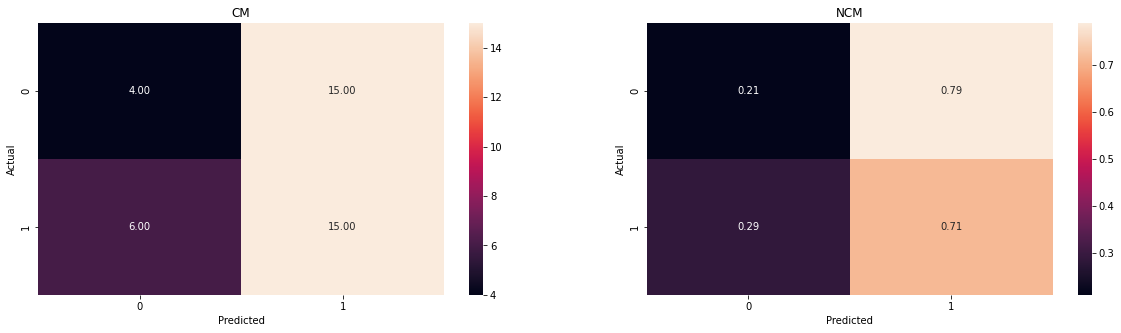

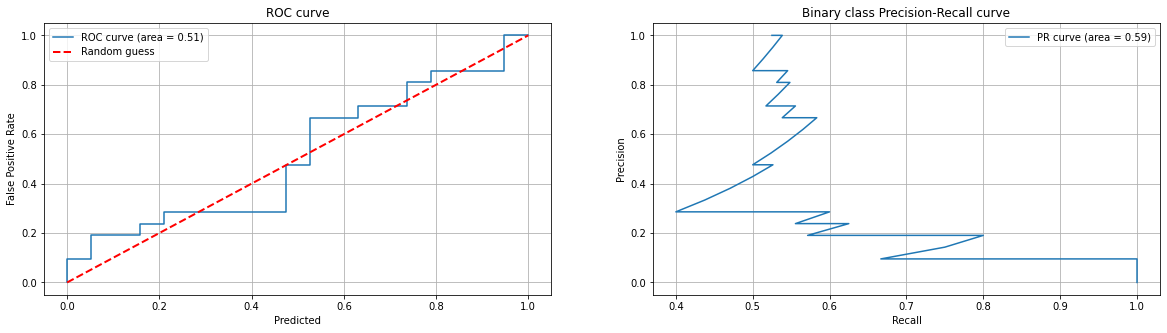

In [6]:
get_report(y_test, y_pred.detach().cpu().numpy(),y_pred_score.detach().cpu().numpy())


In [8]:
h,trials=Classifier(model,optimiser,loss_function=loss_function,batch_size=15).optimize_hyperparam(X=X,y=y, test_size=0.4, epochs=1,num_h_layers=(3,10))


In [9]:
decompose_trial_into_relevant_columns_pandas(trials)


,loss,num_h_layers
0,0.425,8
1,0.550,5
2,0.550,4
3,0.550,5
4,0.550,6
5,0.575,8
6,0.450,7
7,0.475,3
8,0.550,8
9,0.550,5


In [10]:
classifier.verbose=True
classifier.score_per_class(X_test, y_test)

Accuracy for class: 0 is 100.0 %
Accuracy for class: 1 is 0.0 %


# Show peformance on multiclass data